# Import PEPA module

In [14]:
import sys
PEPA_repository_path = f"../../PhaseTravelTime"
sys.path.insert(0,PEPA_repository_path)

# Libraries

In [18]:
from PhaseTravelTime.vel import Vel3DModel
from PhaseTravelTime.vel import ReadVel3DModel
from PhaseTravelTime.tt import ReadTraveltime
from PhaseTravelTime.tt import TravelTime
from PhaseTravelTime.utils import isfile

import os

In [19]:
data = "../data"
out = "../outs"

vel1dfile = os.path.join(data,'vel1dmodel.csv')
vel_out = os.path.join(out,"vel")
tt_out = os.path.join(out,"tt")

In [20]:
lats = 5.5
latn = 8
lonw = -76
lone = -72
dep0 = -5     
dep1 = 200
ndepth = int((dep1-dep0))+1 #numero de puntos en z
nlat = 101   #numero de puntos en lat
nlon = 101   #numero de puntos en lon

#colombian
# lats = -5
# latn = 14
# lonw = -80
# lone = -65
# dep0 = -5    
# dep1 = 200
# ndepth = 206
# nlat = 251
# nlon = 251

#archivos que se van a crear
vel_P = os.path.join(vel_out,"P_VelModel.h5")
vel_S = os.path.join(vel_out,"S_VelModel.h5")

vel3d = Vel3DModel(vel1dfile,lats,latn,lonw,lone,
                    dep0,dep1,ndepth,nlat,nlon)
p_model = vel3d.get_model("P",vel_P )
s_model = vel3d.get_model("S",vel_S)

In [21]:
network = os.path.join(data,"sgc_net.csv") # geometria de red
vel_models = {"P":vel_P,
            "S":vel_S }  #modelos de velocidad creados
tt_paths = {"P":os.path.join(tt_out,"P_tt.h5"),
            "S":os.path.join(tt_out,"S_tt.h5") } #donde se guardaran archivos necesarios

In [22]:
TT = TravelTime(vel_models,network,tt_paths)
TT.solver() 

02-23 05:58 [INFO] [Traveltime.solver] running
02-23 05:58 [INFO] [P-CM.BAR2] running
02-23 05:58 [INFO] [S-CM.BAR2] running
02-23 05:58 [INFO] [S-CM.BAR2] ok-time: 12.83 seconds
02-23 05:58 [INFO] [S-CM.BRJC] running
02-23 05:58 [INFO] [P-CM.BAR2] ok-time: 12.95 seconds
02-23 05:58 [INFO] [P-CM.BRJC] running
02-23 05:59 [INFO] [S-CM.BRJC] ok-time: 14.9 seconds
02-23 05:59 [INFO] [S-CM.HEL] running
02-23 05:59 [INFO] [P-CM.BRJC] ok-time: 15.13 seconds
02-23 05:59 [INFO] [P-CM.HEL] running
02-23 05:59 [INFO] [S-CM.HEL] ok-time: 14.79 seconds
02-23 05:59 [INFO] [S-CM.OCA] running
02-23 05:59 [INFO] [P-CM.HEL] ok-time: 14.97 seconds
02-23 05:59 [INFO] [P-CM.OCA] running
02-23 05:59 [INFO] [S-CM.OCA] ok-time: 3.8 seconds
02-23 05:59 [INFO] [S-CM.PAM] running
02-23 05:59 [INFO] [P-CM.OCA] ok-time: 4.53 seconds
02-23 05:59 [INFO] [P-CM.PAM] running
02-23 05:59 [INFO] [S-CM.PAM] ok-time: 11.45 seconds
02-23 05:59 [INFO] [S-CM.PTB] running
02-23 05:59 [INFO] [P-CM.PAM] ok-time: 12.0 seconds
02

# Get picks

In [23]:
tt = ReadTraveltime(tt_paths)

available stations

In [24]:
tt.stations

{'P': ['CM.BAR2.P',
  'CM.BRJC.P',
  'CM.HEL.P',
  'CM.OCA.P',
  'CM.PAM.P',
  'CM.PTB.P',
  'CM.RUS.P',
  'CM.SPBC.P',
  'CM.ZAR.P'],
 'S': ['CM.BAR2.S',
  'CM.BRJC.S',
  'CM.HEL.S',
  'CM.OCA.S',
  'CM.PAM.S',
  'CM.PTB.S',
  'CM.RUS.S',
  'CM.SPBC.S',
  'CM.ZAR.S']}

available depths

In [25]:
tt.depths

{'P': ['-1.0',
  '-2.0',
  '-3.0',
  '-4.0',
  '-5.0',
  '0.0',
  '1.0',
  '10.0',
  '100.0',
  '101.0',
  '102.0',
  '103.0',
  '104.0',
  '105.0',
  '106.0',
  '107.0',
  '108.0',
  '109.0',
  '11.0',
  '110.0',
  '111.0',
  '112.0',
  '113.0',
  '114.0',
  '115.0',
  '116.0',
  '117.0',
  '118.0',
  '119.0',
  '12.0',
  '120.0',
  '121.0',
  '122.0',
  '123.0',
  '124.0',
  '125.0',
  '126.0',
  '127.0',
  '128.0',
  '129.0',
  '13.0',
  '130.0',
  '131.0',
  '132.0',
  '133.0',
  '134.0',
  '135.0',
  '136.0',
  '137.0',
  '138.0',
  '139.0',
  '14.0',
  '140.0',
  '141.0',
  '142.0',
  '143.0',
  '144.0',
  '145.0',
  '146.0',
  '147.0',
  '148.0',
  '149.0',
  '15.0',
  '150.0',
  '151.0',
  '152.0',
  '153.0',
  '154.0',
  '155.0',
  '156.0',
  '157.0',
  '158.0',
  '159.0',
  '16.0',
  '160.0',
  '161.0',
  '162.0',
  '163.0',
  '164.0',
  '165.0',
  '166.0',
  '167.0',
  '168.0',
  '169.0',
  '17.0',
  '170.0',
  '171.0',
  '172.0',
  '173.0',
  '174.0',
  '175.0',
  '176.0',


# Test

In [26]:
from PhaseTravelTime.utils import get_picks
from obspy import UTCDateTime

sf = "/home/emmanuel/test/PEPA/dataset/sgc_events/SGC2022ciilif.xml" 
sgc_picks = get_picks(sf)
sgc_picks.head(20)

,id,network,station,P_tt,S_tt
0,SGC2022ciilif,CM,BAR2,2022-02-02T20:43:20.317770Z,2022-02-02T20:43:35.569778Z
1,SGC2022ciilif,CM,BRJC,2022-02-02T20:43:21.919798Z,2022-02-02T20:43:38.967742Z
2,SGC2022ciilif,CM,PAM,2022-02-02T20:43:23.358544Z,2022-02-02T20:43:40.264868Z
3,SGC2022ciilif,CM,RUS,2022-02-02T20:43:24.208687Z,2022-02-02T20:43:42.757412Z
4,SGC2022ciilif,CM,PTB,2022-02-02T20:43:26.647375Z,2022-02-02T20:43:47.974086Z
5,SGC2022ciilif,CM,SPBC,2022-02-02T20:43:28.989966Z,2022-02-02T20:43:50.721230Z
6,SGC2022ciilif,CM,YPLC,2022-02-02T20:43:30.781296Z,2022-02-02T20:43:54.497087Z
7,SGC2022ciilif,CM,CHI,2022-02-02T20:43:38.528976Z,2022-02-02T20:44:07.810323Z
8,SGC2022ciilif,CM,ZAR,2022-02-02T20:43:33.661773Z,2022-02-02T20:43:58.052242Z
9,SGC2022ciilif,CM,TABC,2022-02-02T20:43:37.062177Z,2022-02-02T20:44:05.223891Z


In [27]:
data = tt.get_traveltimes(dep =142,lat=6.78,lon=-73.2,
                            networks=["CM"],stations=["BAR2","BRJC","PAM","RUS","PTB","SPBC"],
                            # origin=UTCDateTime("2022-02-02 20:42:59") )
                            origin=UTCDateTime("2022-02-02 20:43:01") ) 
data

,network,station,P_tt,P_veracity,S_tt,S_veracity
0,CM,BAR2,2022-02-02 20:43:20.167165044,1,2022-02-02 20:43:35.117772897,1
1,CM,BRJC,2022-02-02 20:43:21.290565141,1,2022-02-02 20:43:37.117435481,1
2,CM,PAM,2022-02-02 20:43:23.095565839,1,2022-02-02 20:43:40.330369367,1
3,CM,RUS,2022-02-02 20:43:24.242956205,1,2022-02-02 20:43:42.372740689,1
4,CM,PTB,2022-02-02 20:43:26.994339731,1,2022-02-02 20:43:47.270234996,1
5,CM,SPBC,2022-02-02 20:43:28.548701172,1,2022-02-02 20:43:50.037022656,1


In [28]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("http://sismo.sgc.gov.co:8080/")
st = client.get_waveforms(network="CM",station="BAR2,BRJC,PAM,RUS,PTB,SPBC",location="00",channel="HHZ",
                      starttime=UTCDateTime("2022-02-02 20:42:59"),
                      endtime=UTCDateTime("2022-02-02 20:43:59"))
st = st.sort(keys=["starttime"])
st = st.normalize()
st.detrend()
st.filter("bandpass",freqmin=4,freqmax=20)
st

5 Trace(s) in Stream:
CM.PTB.00.HHZ  | 2022-02-02T20:42:58.998391Z - 2022-02-02T20:43:58.998391Z | 100.0 Hz, 6001 samples
CM.SPBC.00.HHZ | 2022-02-02T20:42:58.998391Z - 2022-02-02T20:43:58.998391Z | 100.0 Hz, 6001 samples
CM.RUS.00.HHZ  | 2022-02-02T20:42:58.998393Z - 2022-02-02T20:43:58.998393Z | 100.0 Hz, 6001 samples
CM.BAR2.00.HHZ | 2022-02-02T20:42:58.998393Z - 2022-02-02T20:43:58.998393Z | 100.0 Hz, 6001 samples
CM.BRJC.00.HHZ | 2022-02-02T20:42:59.000000Z - 2022-02-02T20:43:59.000000Z | 100.0 Hz, 6001 samples

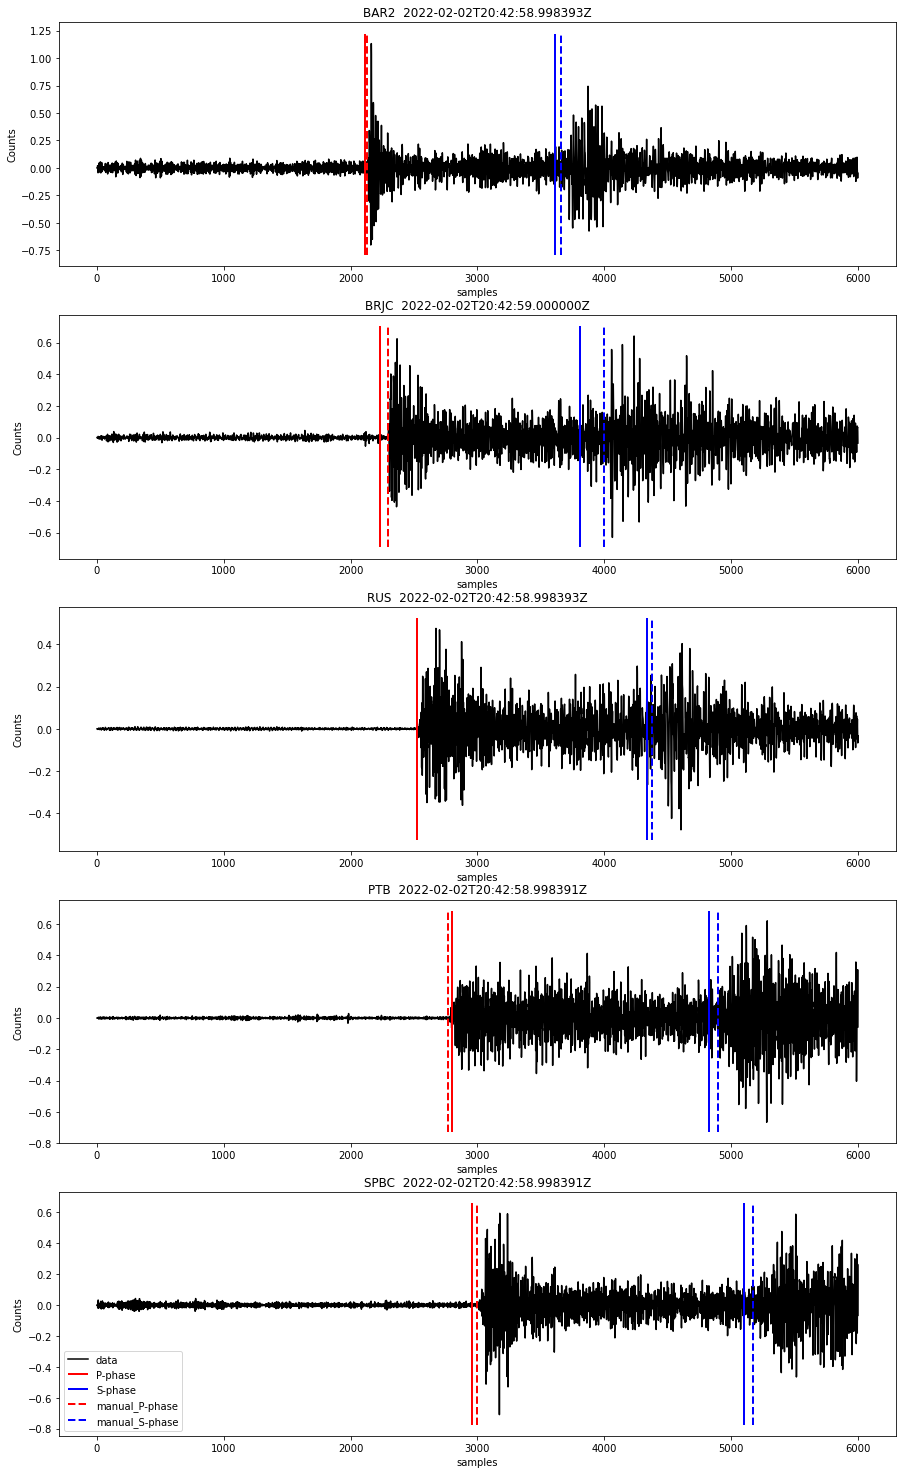

In [29]:
import matplotlib.pyplot as plt
from PhaseTravelTime.utils import plot_stations

plot_stations(st,data,sgc_picks,figsize=(15,26))
plt.savefig("BAR2.png",dpi=300, facecolor='w', transparent=False)
plt.show()